In [2]:
import tensorflow as tf
import numpy as np
import os

In [3]:
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input

In [5]:
# model=tf.keras.models.load_model("trained_retinal_model_v2.h5")

In [6]:
# Ensure the F1Score class is defined in the current environment

import tensorflow as tf
from tensorflow.keras.models import load_model

# Define the F1Score class if it's not already in the current script.
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name="f1_score", **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        self.true_positives = self.add_weight(name="tp", initializer="zeros")
        self.false_positives = self.add_weight(name="fp", initializer="zeros")
        self.false_negatives = self.add_weight(name="fn", initializer="zeros")

    def update_state(self, y_true, y_pred, sample_weight=None):
        # Convert predictions to class labels
        y_pred = tf.argmax(y_pred, axis=-1)
        y_true = tf.argmax(y_true, axis=-1)

        # Calculate true positives, false positives, and false negatives
        tp = tf.reduce_sum(tf.cast(tf.equal(y_true, y_pred), tf.float32))
        fp = tf.reduce_sum(tf.cast(tf.equal(y_true, 0) & tf.not_equal(y_pred, y_true), tf.float32))
        fn = tf.reduce_sum(tf.cast(tf.equal(y_pred, 0) & tf.not_equal(y_true, y_pred), tf.float32))

        self.true_positives.assign_add(tp)
        self.false_positives.assign_add(fp)
        self.false_negatives.assign_add(fn)

    def result(self):
        precision = self.true_positives / (self.true_positives + self.false_positives + tf.keras.backend.epsilon())
        recall = self.true_positives / (self.true_positives + self.false_negatives + tf.keras.backend.epsilon())
        f1 = 2 * (precision * recall) / (precision + recall + tf.keras.backend.epsilon())
        return f1

    def reset_states(self):
        self.true_positives.assign(0)
        self.false_positives.assign(0)
        self.false_negatives.assign(0)




In [7]:
# Load the model with the custom F1Score metric
model = load_model("trained_retinal_model_v2.h5", custom_objects={"F1Score": F1Score})

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 MobilenetV3large (Functiona  (None, 1000)             5507432   
 l)                                                              
                                                                 
 dense (Dense)               (None, 4)                 4004      
                                                                 
Total params: 5,511,436
Trainable params: 5,487,036
Non-trainable params: 24,400
_________________________________________________________________


In [ ]:
img_path=r"..\data\retina\test\DME\DME-30521-17.jpeg"

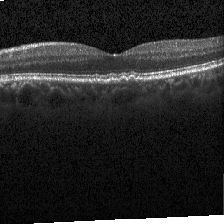

In [16]:

img_path=r"..\data\retina\val\DRUSEN\DRUSEN-11129-3.jpeg"
img=tf.keras.utils.load_img(img_path,target_size=(224,224))
img

In [17]:
x=tf.keras.utils.img_to_array(img)
x=np.expand_dims(x,axis=0)
x.shape
x=preprocess_input(x)

In [18]:
x.shape

(1, 224, 224, 3)

In [19]:
pred=model.predict(x)

1/1 [==============================] - 0s 27ms/step


In [20]:
pred

array([[0.02386259, 0.004351  , 0.9571265 , 0.01465992]], dtype=float32)

In [21]:
class_name=['CNV','DME','DRUSEN','NORMAL']

In [22]:
result_index=np.argmax(pred)
print("Model prediciton:",class_name[result_index])

Model prediciton: DRUSEN
